In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
import seaborn as sns
import tqdm.autonotebook as tqdman
from sklearn.linear_model import LinearRegression

import utils

/tmp/ipykernel_45741/3380697544.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdman


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
ID = "zn_fullset"

<IPython.core.display.Javascript object>

In [4]:
INPUT_FILE = Path(utils.DATA_DIR / "interim" / "delta_rf" / f"{ID}_delta-erf_meta.csv")

<IPython.core.display.Javascript object>

In [5]:
pdf = pd.read_csv(INPUT_FILE)
pdf

,2100_warming,SRM_years,TCRE,average_cdr_between_peak_and_15_temp,climate_model,ensemble_member,max_CDR,model,ms,net_CDR_at_15_temp,peak_warming,region,run_id,scenario,total_CDR,unit,variable,year_return_back_below_15_temp
0,2.489039,327,NaN,12994.469368,MAGICCv7.5.3,0,-13683.159952,AIM/CGE 2.1,AIM/CGE 2.1CD-LINKS_INDC2030i_1600,-3.090391e+06,2.627932,World,0.0,CD-LINKS_INDC2030i_1600,-4.910419e+06,K,Surface Air Temperature Change,2382.0
1,2.489039,327,NaN,12994.469368,MAGICCv7.5.3,0,-13683.159952,AIM/CGE 2.1,AIM/CGE 2.1CD-LINKS_INDC2030i_1600,-3.090391e+06,2.627932,World,0.0,CD-LINKS_INDC2030i_1600,-4.910419e+06,W/m^2,Effective Radiative Forcing,2382.0
2,2.489039,327,1.950013,12994.469368,MAGICCv7.5.3,0,-13683.159952,AIM/CGE 2.1,AIM/CGE 2.1CD-LINKS_INDC2030i_1600,-3.090391e+06,2.627932,World,NaN,CD-LINKS_INDC2030i_1600,-4.910419e+06,W/m^2,delta_rf,2382.0
3,2.147834,309,NaN,8306.886932,MAGICCv7.5.3,0,-8395.374329,AIM/CGE 2.1,AIM/CGE 2.1CD-LINKS_NDC2030i_1000,-2.269008e+06,2.156935,World,600.0,CD-LINKS_NDC2030i_1000,-3.531033e+06,K,Surface Air Temperature Change,2364.0
4,2.147834,309,NaN,8306.886932,MAGICCv7.5.3,0,-8395.374329,AIM/CGE 2.1,AIM/CGE 2.1CD-LINKS_NDC2030i_1000,-2.269008e+06,2.156935,World,600.0,CD-LINKS_NDC2030i_1000,-3.531033e+06,W/m^2,Effective Radiative Forcing,2364.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624595,3.416044,374,NaN,29597.092478,MAGICCv7.5.3,599,-29909.038348,WITCH-GLOBIOM 4.4,WITCH-GLOBIOM 4.4CD-LINKS_INDCi,-8.274526e+06,4.629579,World,1199.0,CD-LINKS_INDCi,-9.484346e+06,W/m^2,Effective Radiative Forcing,2464.0
624596,3.416044,374,1.771202,29597.092478,MAGICCv7.5.3,599,-29909.038348,WITCH-GLOBIOM 4.4,WITCH-GLOBIOM 4.4CD-LINKS_INDCi,-8.274526e+06,4.629579,World,NaN,CD-LINKS_INDCi,-9.484346e+06,W/m^2,delta_rf,2464.0
624597,1.605667,65,NaN,7296.929958,MAGICCv7.5.3,599,-29455.160688,WITCH-GLOBIOM 4.4,WITCH-GLOBIOM 4.4CD-LINKS_NDC2030i_1000,-4.013311e+05,1.754784,World,1799.0,CD-LINKS_NDC2030i_1000,-1.146115e+07,K,Surface Air Temperature Change,2115.0
624598,1.605667,65,NaN,7296.929958,MAGICCv7.5.3,599,-29455.160688,WITCH-GLOBIOM 4.4,WITCH-GLOBIOM 4.4CD-LINKS_NDC2030i_1000,-4.013311e+05,1.754784,World,1799.0,CD-LINKS_NDC2030i_1000,-1.146115e+07,W/m^2,Effective Radiative Forcing,2115.0


<IPython.core.display.Javascript object>

## Add median stats for each scenario

Median here is over all the MAGICC ensemble members

In [6]:
median_stats = (
    pdf.set_index(["ms", "ensemble_member"])[
        [
            "peak_warming",
            "SRM_years",
            "year_return_back_below_15_temp",
            "2100_warming",
            "average_cdr_between_peak_and_15_temp",
        ]
    ]
    .groupby("ms")
    .median()
)
# peak_warming_median.name = "peak_warming_median_for_ms"
median_stats = median_stats.rename(
    {
        "peak_warming": "peak_warming_median_for_ms",
        "SRM_years": "SRM_years_for_ms",
        "year_return_back_below_15_temp": "year_return_back_below_15_temp_for_ms",
        "2100_warming": "2100_warming_for_ms",
        "average_cdr_between_peak_and_15_temp": "average_cdr_between_peak_and_15_temp_for_ms",
    },
    axis="columns",
)
median_stats.head()

,peak_warming_median_for_ms,SRM_years_for_ms,year_return_back_below_15_temp_for_ms,2100_warming_for_ms,average_cdr_between_peak_and_15_temp_for_ms
ms,,,,,
AIM/CGE 2.1CD-LINKS_INDC2030i_1600,2.378954,264.0,2313.0,2.281002,12250.485504
AIM/CGE 2.1CD-LINKS_NDC2030i_1000,1.991439,216.0,2268.0,1.963479,8076.667925
AIM/CGE 2.2EN_INDCi2030_1000f,1.965267,130.0,2177.0,1.820192,7728.354476
AIM/CGE 2.2EN_INDCi2030_1200,1.982392,182.0,2225.0,1.928751,5756.770079
AIM/CGE 2.2EN_INDCi2030_1200f,2.029059,147.0,2191.0,1.921146,8432.893611


<IPython.core.display.Javascript object>

In [7]:
pdf_plus = pdf.set_index("ms").join(median_stats).reset_index()
pdf_plus.head()

,ms,2100_warming,SRM_years,TCRE,average_cdr_between_peak_and_15_temp,climate_model,ensemble_member,max_CDR,model,net_CDR_at_15_temp,...,scenario,total_CDR,unit,variable,year_return_back_below_15_temp,peak_warming_median_for_ms,SRM_years_for_ms,year_return_back_below_15_temp_for_ms,2100_warming_for_ms,average_cdr_between_peak_and_15_temp_for_ms
0,AIM/CGE 2.1CD-LINKS_INDC2030i_1600,2.489039,327,NaN,12994.469368,MAGICCv7.5.3,0,-13683.159952,AIM/CGE 2.1,-3.090391e+06,...,CD-LINKS_INDC2030i_1600,-4.910419e+06,K,Surface Air Temperature Change,2382.0,2.378954,264.0,2313.0,2.281002,12250.485504
1,AIM/CGE 2.1CD-LINKS_INDC2030i_1600,2.489039,327,NaN,12994.469368,MAGICCv7.5.3,0,-13683.159952,AIM/CGE 2.1,-3.090391e+06,...,CD-LINKS_INDC2030i_1600,-4.910419e+06,W/m^2,Effective Radiative Forcing,2382.0,2.378954,264.0,2313.0,2.281002,12250.485504
2,AIM/CGE 2.1CD-LINKS_INDC2030i_1600,2.489039,327,1.950013,12994.469368,MAGICCv7.5.3,0,-13683.159952,AIM/CGE 2.1,-3.090391e+06,...,CD-LINKS_INDC2030i_1600,-4.910419e+06,W/m^2,delta_rf,2382.0,2.378954,264.0,2313.0,2.281002,12250.485504
3,AIM/CGE 2.1CD-LINKS_INDC2030i_1600,4.067900,342,NaN,13357.417778,MAGICCv7.5.3,1,-13683.159952,AIM/CGE 2.1,-3.528252e+06,...,CD-LINKS_INDC2030i_1600,-4.910419e+06,K,Surface Air Temperature Change,2414.0,2.378954,264.0,2313.0,2.281002,12250.485504
4,AIM/CGE 2.1CD-LINKS_INDC2030i_1600,4.067900,342,NaN,13357.417778,MAGICCv7.5.3,1,-13683.159952,AIM/CGE 2.1,-3.528252e+06,...,CD-LINKS_INDC2030i_1600,-4.910419e+06,W/m^2,Effective Radiative Forcing,2414.0,2.378954,264.0,2313.0,2.281002,12250.485504


<IPython.core.display.Javascript object>

## Scenario uncertainty

First illustration of how sensitive SRM-years is to different scenario characteristics

(346, 2)

LinregressResult(slope=67.4306239284561, intercept=53.32443174264145, rvalue=0.5501297352399046, pvalue=9.21195739041322e-29, stderr=5.518747254847809, intercept_stderr=14.469958290515683)

(0.0, 500.0)

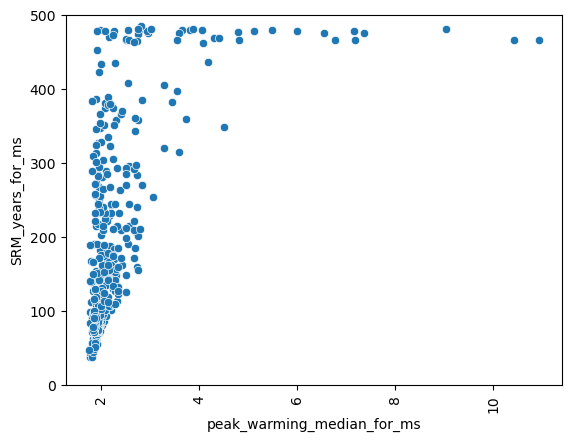

<IPython.core.display.Javascript object>

In [8]:
x = "peak_warming_median_for_ms"
y = "SRM_years_for_ms"

pdfh = pdf_plus[[x, y]].drop_duplicates()
display(pdfh.shape)
display(scipy.stats.linregress(pdfh[x], pdfh[y]))

ax = sns.scatterplot(data=pdfh, y=y, x=x)
# ax.legend(bbox_to_anchor=(1.05, 0.5), loc="center left")
plt.xticks(rotation=90)
ax.set_ylim([0, 500])

Plot above shows:

- Median SRM commitment is never zero (makes sense because scenarios all have peak warming > 1.5C)
- As median peak warming increases, median SRM commitment increases too, but relationship is pretty weak (r-squared is low)
- Massive variation in median SRM commitment just based on scenario

This plot motivates the questions:

- What controls the variation in median SRM commitment?
- How does uncertainty in SRM commitment look?

### Key variation in SRM years

(346, 3)

LinregressResult(slope=67.4306239284561, intercept=53.32443174264145, rvalue=0.5501297352399046, pvalue=9.21195739041322e-29, stderr=5.518747254847809, intercept_stderr=14.469958290515683)

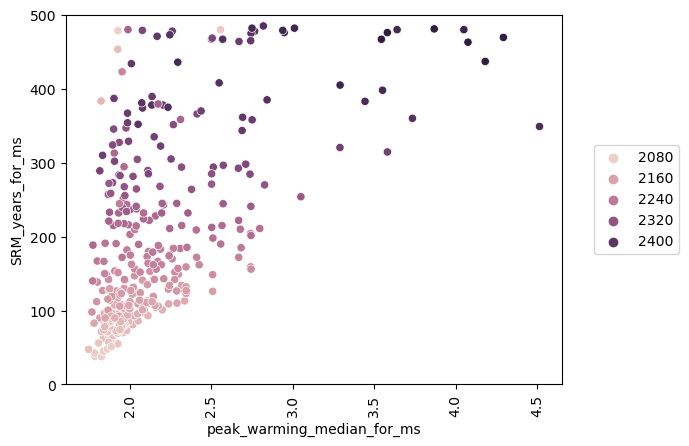

<IPython.core.display.Javascript object>

In [9]:
x = "peak_warming_median_for_ms"
y = "SRM_years_for_ms"
hue = "year_return_back_below_15_temp_for_ms"

pdfh = pdf_plus[[x, y, hue]].drop_duplicates()
display(pdfh.shape)
display(scipy.stats.linregress(pdfh[x], pdfh[y]))

ax = sns.scatterplot(data=pdfh, y=y, x=x, hue=hue)
# ax.legend(bbox_to_anchor=(1.05, 0.5), loc="center left")
plt.xticks(rotation=90)
ax.set_ylim([0, 500])
ax.legend(loc="center left", bbox_to_anchor=(1.05, 0.5))

(346, 3)

LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan, intercept_stderr=nan)

(0.0, 500.0)

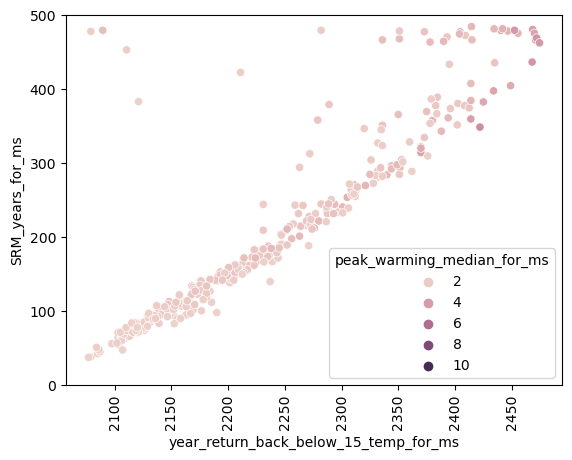

<IPython.core.display.Javascript object>

In [10]:
hue = "peak_warming_median_for_ms"
y = "SRM_years_for_ms"
x = "year_return_back_below_15_temp_for_ms"

pdfh = pdf_plus[[x, y, hue]].drop_duplicates()
display(pdfh.shape)
display(scipy.stats.linregress(pdfh[x], pdfh[y]))

ax = sns.scatterplot(data=pdfh, y=y, x=x, hue=hue)
# ax.legend(bbox_to_anchor=(1.05, 0.5), loc="center left")
plt.xticks(rotation=90)
ax.set_ylim([0, 500])

It's sort of obvious when you think about it/see it, but what really controls the number of SRM-years is how long you would overshoot 1.5C in your baseline scenario. In other words, how long it takes you to remove enough CO2/reduce non-CO2 greenhouse gas emissions enough to get back below 1.5C. The slower you are to do this, the longer you need SRM for.

Thoughts based on this plot:

- The more useful thing might be to make a plot where the x-axis is "average rate of CO2 removal between peak warming and returning back below 1.5C" (because its the average rate which controls the rate of cooling, not the peak rate or the total removals). That puts it back into emissions terms, which is the policy relevant thing, but using the peak warming hue allows us to still see how it's not just the average rate which is important, but also where you start from (i.e. the peak warming).
- I am not sure what is going on with the points at say (2100, 480). I would guess that these are related to non-CO2 or some funny edge effects, but that would be one to check.

We can also explore which scenario info has the best predictive power for SRM years using the below.

In [11]:
y = "SRM_years"
r2s = {}
for c in pdf_plus:
    if y in c:
        continue

    if not str(pdf_plus[c].dtype).startswith("float"):
        continue

    calc_tab = pdf_plus[[c, y, "ensemble_member", "ms"]].drop_duplicates().dropna()

    linreg_res = scipy.stats.linregress(calc_tab[c], calc_tab[y])
    r2 = linreg_res.rvalue**2

    r2s[c] = r2
#     break
pd.Series(r2s).sort_values(ascending=False)

year_return_back_below_15_temp                 0.980814
2100_warming                                   0.511056
year_return_back_below_15_temp_for_ms          0.489719
net_CDR_at_15_temp                             0.412457
2100_warming_for_ms                            0.369063
peak_warming                                   0.345517
peak_warming_median_for_ms                     0.245105
total_CDR                                      0.208203
TCRE                                           0.147758
max_CDR                                        0.131920
average_cdr_between_peak_and_15_temp_for_ms    0.015734
run_id                                         0.006047
average_cdr_between_peak_and_15_temp           0.001372
dtype: float64

<IPython.core.display.Javascript object>

Interestingly, 2100 warming is the best predictor, ZN is surprised by this. Unsurprisingly, the overshoot in the baseline scenario has a big impact, then peak warming, then total CDR and TCRE. I'm also surprised that average CDR isn't a great predictor, I guess it gets washed out/blended in with climate uncertainty.

(346, 3)

LinregressResult(slope=211.49515337814367, intercept=-224.38748954050993, rvalue=0.6952889176477429, pvalue=2.8089765684261337e-51, stderr=11.78750466210824, intercept_stderr=24.97817109902885)

(0.0, 500.0)

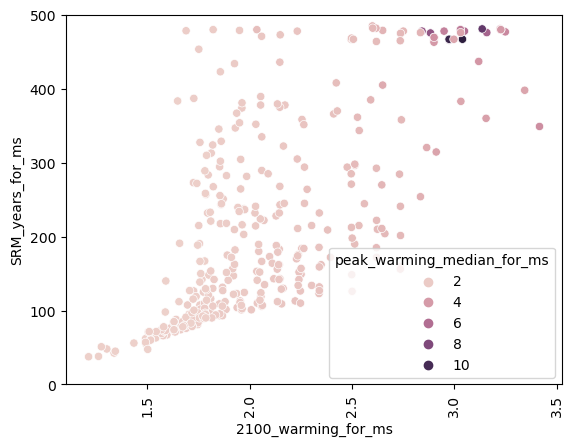

<IPython.core.display.Javascript object>

In [12]:
hue = "peak_warming_median_for_ms"
y = "SRM_years_for_ms"
x = "2100_warming_for_ms"

pdfh = pdf_plus[[x, y, hue]].drop_duplicates()
display(pdfh.shape)
display(scipy.stats.linregress(pdfh[x], pdfh[y]))

ax = sns.scatterplot(data=pdfh, y=y, x=x, hue=hue)
# ax.legend(bbox_to_anchor=(1.05, 0.5), loc="center left")
plt.xticks(rotation=90)
ax.set_ylim([0, 500])

(328, 3)

LinregressResult(slope=-0.007898328494216815, intercept=263.9135806904311, rvalue=-0.3507523766919359, pvalue=6.27707217620148e-11, stderr=0.0011679354056147557, intercept_stderr=11.533002568981821)

(0.0, 500.0)

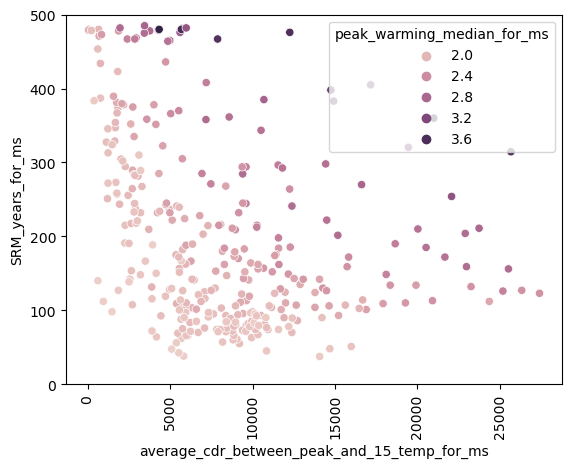

<IPython.core.display.Javascript object>

In [13]:
hue = "peak_warming_median_for_ms"
y = "SRM_years_for_ms"
x = "average_cdr_between_peak_and_15_temp_for_ms"

pdfh = pdf_plus[[x, y, hue]].drop_duplicates()
pdfh = pdfh[pdfh["peak_warming_median_for_ms"] <= 4]
display(pdfh.shape)
display(scipy.stats.linregress(pdfh[x], pdfh[y]))

ax = sns.scatterplot(data=pdfh, y=y, x=x, hue=hue)
# ax.legend(bbox_to_anchor=(1.05, 0.5), loc="center left")
plt.xticks(rotation=90)
ax.set_ylim([0, 500])

Average CDR alone isn't a great predictor but it tells a pretty good story when combined with the peak warming. 

Thoughts:

- Doing a principal analysis could be good to identify the directions which most control variance in SRM-years (maybe peak warming is dominant, then its all about average CDR for the rest of the variance...)

Or which combination of variables (etc. etc.)

In [14]:
y = "SRM_years"
r2s = {}
for c in tqdman.tqdm(pdf_plus, total=pdf_plus.shape[1]):
    for c2 in tqdman.tqdm(pdf_plus, total=pdf_plus.shape[1], leave=False):
        if y in c or y in c2 or c == c2 or c == "run_id" or c2 == "run_id":
            continue

        model = LinearRegression()

        if not str(pdf_plus[c].dtype).startswith("float"):
            continue

        if not str(pdf_plus[c2].dtype).startswith("float"):
            continue

        calc_tab = (
            pdf_plus[[c, c2, y, "ensemble_member", "ms"]].drop_duplicates().dropna()
        )

        X, yy = calc_tab[[c, c2]], calc_tab[y]
        model.fit(X, yy)
        r_squared = model.score(X, yy)

        r2s[(c, c2)] = r_squared
    #         break
#     if r2s:
#         break
r2s_df = pd.Series(r2s).sort_values(ascending=False)
r2s_df.head()

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

max_CDR                         year_return_back_below_15_temp          0.981522
year_return_back_below_15_temp  max_CDR                                 0.981522
total_CDR                       year_return_back_below_15_temp          0.981407
year_return_back_below_15_temp  total_CDR                               0.981407
                                average_cdr_between_peak_and_15_temp    0.981300
dtype: float64

<IPython.core.display.Javascript object>

In [15]:
r2s_df.loc["TCRE", :].head(50).to_frame()

,0
year_return_back_below_15_temp,0.981205
year_return_back_below_15_temp_for_ms,0.668685
2100_warming,0.528895
2100_warming_for_ms,0.516821
net_CDR_at_15_temp,0.421184
peak_warming_median_for_ms,0.392863
peak_warming,0.375085
total_CDR,0.355961
max_CDR,0.279678
average_cdr_between_peak_and_15_temp_for_ms,0.163492


<IPython.core.display.Javascript object>

(159646, 3)

LinregressResult(slope=0.0023538665206456763, intercept=212.32651816539482, rvalue=0.1764212321945228, pvalue=0.0, stderr=3.2869165523246395e-05, intercept_stderr=0.557073373206983)

(array([-50000., -40000., -30000., -20000., -10000.,      0.,  10000.]),
 [Text(-50000.0, 0, '−50000'),
  Text(-40000.0, 0, '−40000'),
  Text(-30000.0, 0, '−30000'),
  Text(-20000.0, 0, '−20000'),
  Text(-10000.0, 0, '−10000'),
  Text(0.0, 0, '0'),
  Text(10000.0, 0, '10000')])

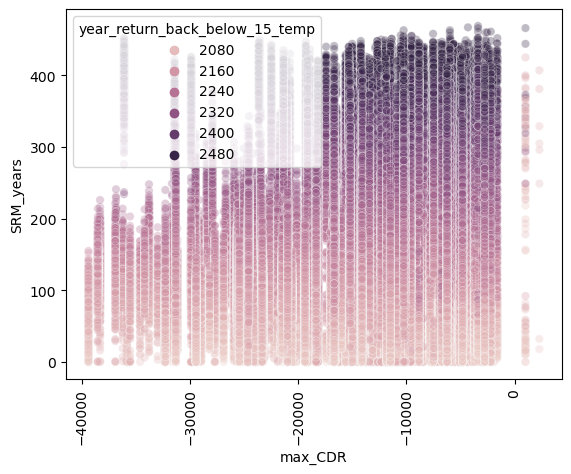

<IPython.core.display.Javascript object>

In [16]:
x = "max_CDR"
y = "SRM_years"
hue = "year_return_back_below_15_temp"

pdfh = pdf_plus[[x, y, hue]].drop_duplicates()
display(pdfh.shape)
display(scipy.stats.linregress(pdfh[x], pdfh[y]))

ax = sns.scatterplot(data=pdfh, y=y, x=x, hue=hue, alpha=0.3)
# ax.legend(bbox_to_anchor=(1.05, 0.5), loc="center left")
plt.xticks(rotation=90)
# ax.set_ylim([0, 500])

(186012, 3)

LinregressResult(slope=5.2739229703568427e-05, intercept=190.11664345997076, rvalue=0.002440254959774629, pvalue=0.29259098205911843, stderr=5.011054645005215e-05, intercept_stderr=0.5202309933367016)

(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000., 30000.,
        35000., 40000.]),
 [Text(-5000.0, 0, '−5000'),
  Text(0.0, 0, '0'),
  Text(5000.0, 0, '5000'),
  Text(10000.0, 0, '10000'),
  Text(15000.0, 0, '15000'),
  Text(20000.0, 0, '20000'),
  Text(25000.0, 0, '25000'),
  Text(30000.0, 0, '30000'),
  Text(35000.0, 0, '35000'),
  Text(40000.0, 0, '40000')])

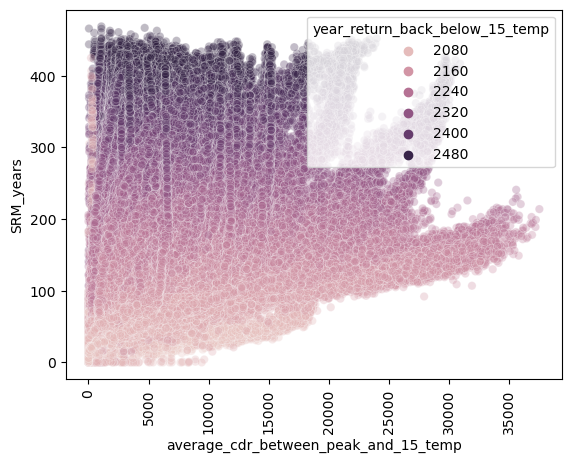

<IPython.core.display.Javascript object>

In [17]:
x = "average_cdr_between_peak_and_15_temp"
y = "SRM_years"
hue = "year_return_back_below_15_temp"

pdfh = pdf_plus[[x, y, hue]].drop_duplicates()
display(pdfh.shape)
display(scipy.stats.linregress(pdfh[x], pdfh[y]))

ax = sns.scatterplot(data=pdfh, y=y, x=x, hue=hue, alpha=0.3)
# ax.legend(bbox_to_anchor=(1.05, 0.5), loc="center left")
plt.xticks(rotation=90)
# ax.set_ylim([0, 500])

(199567, 3)

LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan, intercept_stderr=nan)

(array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ]),
 [Text(0.5, 0, '0.5'),
  Text(1.0, 0, '1.0'),
  Text(1.5, 0, '1.5'),
  Text(2.0, 0, '2.0'),
  Text(2.5, 0, '2.5'),
  Text(3.0, 0, '3.0'),
  Text(3.5, 0, '3.5'),
  Text(4.0, 0, '4.0')])

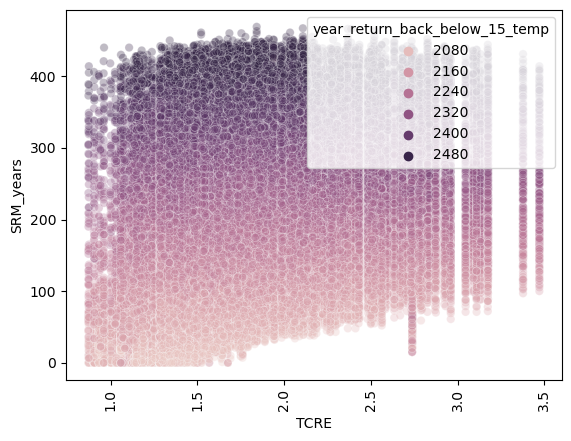

<IPython.core.display.Javascript object>

In [18]:
x = "TCRE"
y = "SRM_years"
hue = "year_return_back_below_15_temp"

pdfh = pdf_plus[[x, y, hue]].drop_duplicates()
display(pdfh.shape)
display(scipy.stats.linregress(pdfh[x], pdfh[y]))

ax = sns.scatterplot(data=pdfh, y=y, x=x, hue=hue, alpha=0.3)
# ax.legend(bbox_to_anchor=(1.05, 0.5), loc="center left")
plt.xticks(rotation=90)
# ax.set_ylim([0, 500])

(277936, 3)

LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan, intercept_stderr=nan)

(array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ]),
 [Text(0.5, 0, '0.5'),
  Text(1.0, 0, '1.0'),
  Text(1.5, 0, '1.5'),
  Text(2.0, 0, '2.0'),
  Text(2.5, 0, '2.5'),
  Text(3.0, 0, '3.0'),
  Text(3.5, 0, '3.5'),
  Text(4.0, 0, '4.0')])

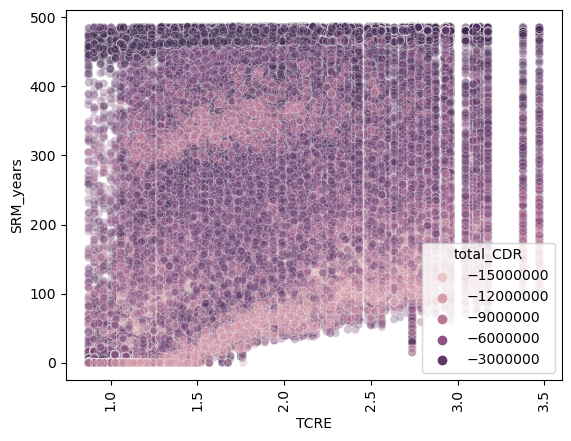

<IPython.core.display.Javascript object>

In [19]:
x = "TCRE"
y = "SRM_years"
hue = "total_CDR"

pdfh = pdf_plus[[x, y, hue]].drop_duplicates()
display(pdfh.shape)
display(scipy.stats.linregress(pdfh[x], pdfh[y]))

ax = sns.scatterplot(data=pdfh, y=y, x=x, hue=hue, alpha=0.3)
# ax.legend(bbox_to_anchor=(1.05, 0.5), loc="center left")
plt.xticks(rotation=90)
# ax.set_ylim([0, 500])

(415064, 3)

LinregressResult(slope=67.34226385615771, intercept=41.94166013780395, rvalue=0.5871262807896889, pvalue=0.0, stderr=0.1441166191890883, intercept_stderr=0.40323806899116615)

(array([-5.,  0.,  5., 10., 15., 20., 25., 30.]),
 [Text(-5.0, 0, '−5'),
  Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30')])

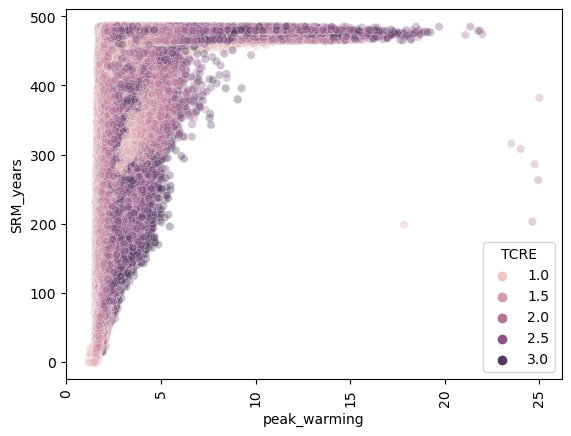

<IPython.core.display.Javascript object>

In [20]:
x = "peak_warming"
y = "SRM_years"
hue = "TCRE"

pdfh = pdf_plus[[x, y, hue]].drop_duplicates()
display(pdfh.shape)
display(scipy.stats.linregress(pdfh[x], pdfh[y]))

ax = sns.scatterplot(data=pdfh, y=y, x=x, hue=hue, alpha=0.3)
# ax.legend(bbox_to_anchor=(1.05, 0.5), loc="center left")
plt.xticks(rotation=90)
# ax.set_ylim([0, 500])

## Climate uncertainty

Pick scenarios that have median peak warming at 1.5, 2.0 and 2.5 (say) and show how climate uncertainty leads to large SRM-year uncertainty.

In [21]:
peaks_of_interest = [1.5, 1.98, 2.0, 2.5, 3.0]
# peaks_of_interest = [2.0]
picked_scenarios = []
for t in tqdman.tqdm(peaks_of_interest):
    picked_idx = (pdf_plus["peak_warming_median_for_ms"] - t).abs().idxmin()
    picked_scenario = pdf_plus.loc[picked_idx, "ms"]
    picked_scenarios.append(picked_scenario)

picked_scenarios

  0%|          | 0/5 [00:00<?, ?it/s]

['WITCH-GLOBIOM 4.4CD-LINKS_NDC2030i_1000',
 'WITCH 5.0EN_INDCi2030_1200_NDCp',
 'WITCH 5.0EN_INDCi2030_1200f',
 'MESSAGEix-GLOBIOM_1.1EN_INDCi2030_2500_COV',
 'REMIND-MAgPIE 2.1-4.2EN_INDCi2100']

<IPython.core.display.Javascript object>

In [22]:
pdf_clim_unc = pdf_plus[pdf_plus["ms"].isin(picked_scenarios)]

<IPython.core.display.Javascript object>

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1.7468630584523557'),
  Text(1, 0, '1.9798646606379748'),
  Text(2, 0, '1.9993604268167604'),
  Text(3, 0, '2.501400754522165'),
  Text(4, 0, '3.0108171008412494')])

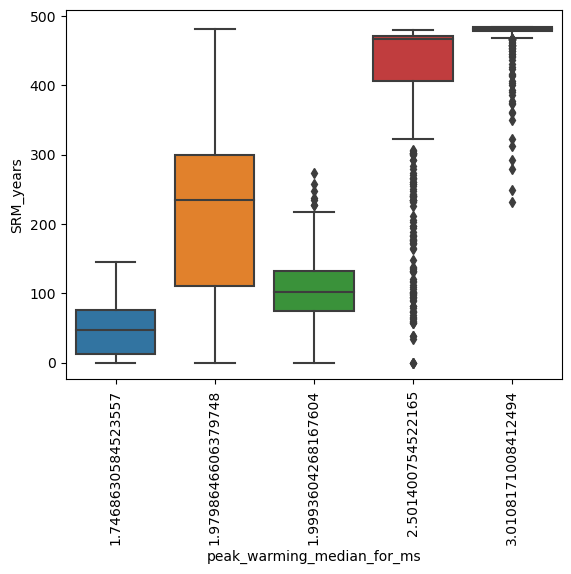

<IPython.core.display.Javascript object>

In [23]:
x = "ms"
x = "peak_warming_median_for_ms"
y = "SRM_years"

pdf_clim_unc_sns = pdf_clim_unc[[x, y, "ensemble_member"]].drop_duplicates()

ax = sns.boxplot(data=pdf_clim_unc_sns, y=y, x=x)
# ax.legend(bbox_to_anchor=(1.05, 0.5), loc="center left")
plt.xticks(rotation=90)

Plot above allows us to make these points:

- Even if your baseline scenario would peak at 1.8C (median), your SRM commitment could be anywhere from zero (best-case) to hundreds of years, with a median commitment of around 50 years. 
- The scenario characteristics (see plots above) have strong impact on both median estimate of SRM years as well as the uncertainty (compare scenarios that have peak warming at 1.98C and 2.0C yet completely different SRM year distributions)

Thought from above plot:

- I wonder what characteristics of scenarios make uncertainty larger or smaller (I'm not sure how to quantify 'larger uncertainty' or show this in a plot so might be best left as an extension idea for now). For example, is it the maximum CDR, the average rate of removal of CDR, non-CO2 stuff, some combination of all of the above?

Pick scenarios with peak warming around some value, then make similar plot as above. That allows us to show how SRM could look under different potential futures (e.g. world which has peak warming around 2.8C in absence of SRM, world which has peak warming around 2.4C in absence of SRM).

In [24]:
peak_val = 2.8
atol = 0.05

# peak_val = 2.4
# atol = 0.05

tmp = pdf_plus.set_index("ms")["peak_warming_median_for_ms"]
picked_scenarios = (
    tmp[(tmp - peak_val).abs() < atol].drop_duplicates().index.values.tolist()
)
picked_scenarios

['COFFEE 1.1EN_INDCi2030_2500',
 'COFFEE 1.1EN_INDCi2030_2500f',
 'REMIND 2.1R2p1_SSP2-NDC',
 'REMIND-MAgPIE 2.1-4.2EN_INDCi2030_2500',
 'REMIND-MAgPIE 2.1-4.2EN_INDCi2030_2500f',
 'REMIND-MAgPIE 2.1-4.2EN_INDCi2100_NDCp',
 'REMIND-MAgPIE 2.1-4.2SusDev_SSP2-NDC']

<IPython.core.display.Javascript object>

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'COFFEE 1.1EN_INDCi2030_2500'),
  Text(1, 0, 'COFFEE 1.1EN_INDCi2030_2500f'),
  Text(2, 0, 'REMIND 2.1R2p1_SSP2-NDC'),
  Text(3, 0, 'REMIND-MAgPIE 2.1-4.2EN_INDCi2030_2500'),
  Text(4, 0, 'REMIND-MAgPIE 2.1-4.2EN_INDCi2030_2500f'),
  Text(5, 0, 'REMIND-MAgPIE 2.1-4.2EN_INDCi2100_NDCp'),
  Text(6, 0, 'REMIND-MAgPIE 2.1-4.2SusDev_SSP2-NDC')])

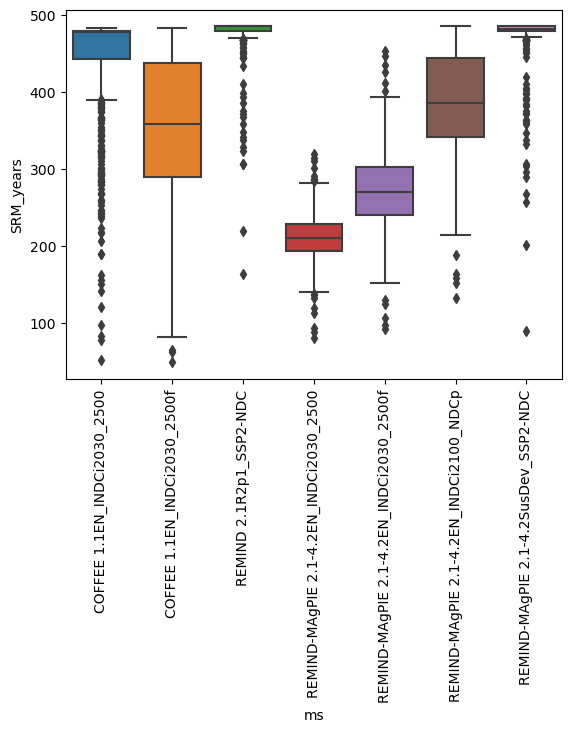

<IPython.core.display.Javascript object>

In [25]:
pdf_clim_unc_2 = pdf_plus[pdf_plus["ms"].isin(picked_scenarios)]

x = "ms"
# x = "peak_warming_median_for_ms"
y = "SRM_years"

pdf_clim_unc_sns = pdf_clim_unc_2[[x, y, "ensemble_member"]].drop_duplicates()

ax = sns.boxplot(data=pdf_clim_unc_sns, y=y, x=x)
# ax.legend(bbox_to_anchor=(1.05, 0.5), loc="center left")
plt.xticks(rotation=90)

## Scratch

Bits and pieces that Zeb hasn't really thought through

(0.0, 25.0)

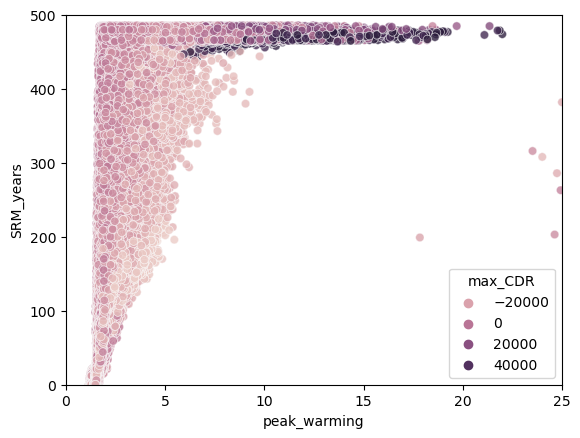

<IPython.core.display.Javascript object>

In [26]:
ax = sns.scatterplot(
    data=pdf,
    x="peak_warming",
    y="SRM_years",
    hue="max_CDR",
    alpha=0.4,
)
ax.set_ylim([0, 500])
ax.set_xlim([0, 25])

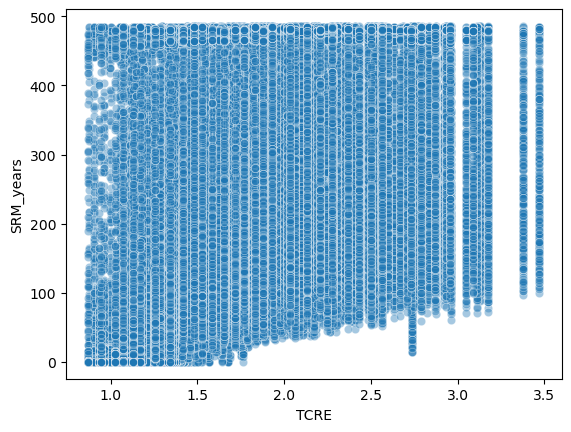

<IPython.core.display.Javascript object>

In [27]:
ax = sns.scatterplot(
    data=pdf,
    x="TCRE",
    y="SRM_years",
    #     hue="peak_warming",
    alpha=0.4,
)
# ax.set_ylim([0, 500])
# ax.set_xlim([0, 25])

- higher overshoot in base implies more SRM (obvious)
- longer overshoot in base implies longer SRM (obvious)
- faster CDR implies shorter SRM (obvious)
    - need average CDR over overshoot period
    - SRM less than 10 years only possible if average CDR > X or your overshoot < Y
- climate uncertainty for given set of scenarios
- scenario uncertainty for given climate

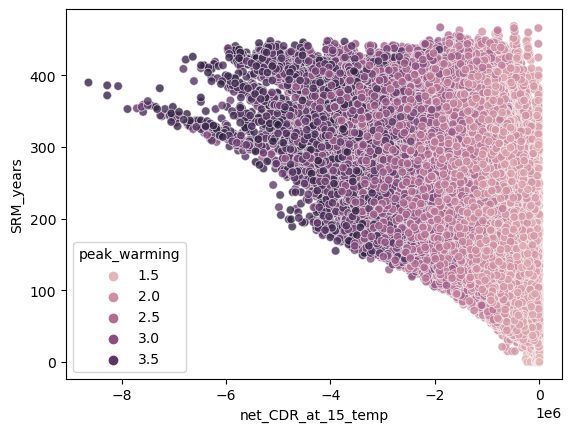

<IPython.core.display.Javascript object>

In [28]:
ax = sns.scatterplot(
    data=pdf[pdf["peak_warming"] < 4],
    x="net_CDR_at_15_temp",
    y="SRM_years",
    hue="peak_warming",
    alpha=0.4,
)
# ax.set_ylim([0, 500])
# ax.set_xlim([0, 25])

In [29]:
pdf.columns.tolist()

['2100_warming',
 'SRM_years',
 'TCRE',
 'average_cdr_between_peak_and_15_temp',
 'climate_model',
 'ensemble_member',
 'max_CDR',
 'model',
 'ms',
 'net_CDR_at_15_temp',
 'peak_warming',
 'region',
 'run_id',
 'scenario',
 'total_CDR',
 'unit',
 'variable',
 'year_return_back_below_15_temp']

<IPython.core.display.Javascript object>

In [30]:
pdf_median_climate = pdf[
    [
        "SRM_years",
        "TCRE",
        #  'climate_model',
        #         "ensemble_member",
        "max_CDR",
        #  'model',
        "ms",
        #  'net_CDR_at_15_temp',
        "peak_warming",
        #  'region',
        #  'run_id',
        #  'scenario',
        #  'total_CDR',
        #  'total_emissions',
        #  'unit',
        #  'variable',
        #  'year_return_back_below_15_temp'
    ]
]
group_cols = ["ms", "max_CDR"]
pdf_median_climate = pdf_median_climate.groupby(group_cols).median()
pdf_median_climate

,,SRM_years,TCRE,peak_warming
ms,max_CDR,,,
AIM/CGE 2.1CD-LINKS_INDC2030i_1600,-13683.159952,264.0,1.733691,2.378954
AIM/CGE 2.1CD-LINKS_NDC2030i_1000,-8395.374329,216.0,1.733691,1.991439
AIM/CGE 2.2EN_INDCi2030_1000f,-10788.933173,130.0,1.733691,1.965267
AIM/CGE 2.2EN_INDCi2030_1200,-13784.653839,182.0,1.733691,1.982392
AIM/CGE 2.2EN_INDCi2030_1200f,-13334.209558,147.0,1.733691,2.029059
...,...,...,...,...
WITCH 5.0EN_INDCi2030_900_NDCp,-19137.344319,221.0,1.733691,1.871138
WITCH 5.0EN_INDCi2030_900f_NDCp,-19370.291148,90.0,1.733691,1.907912
WITCH-GLOBIOM 4.4CD-LINKS_INDC2030i_1600,-6239.176720,90.0,1.733691,1.848499


<IPython.core.display.Javascript object>

(0.0, 4.0)

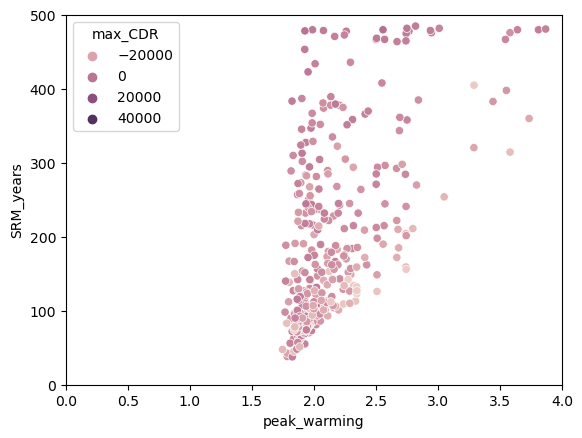

<IPython.core.display.Javascript object>

In [31]:
ax = sns.scatterplot(
    data=pdf_median_climate,
    x="peak_warming",
    y="SRM_years",
    hue="max_CDR",
    #     alpha=0.4,
)
ax.set_ylim([0, 500])
ax.set_xlim([0, 4])

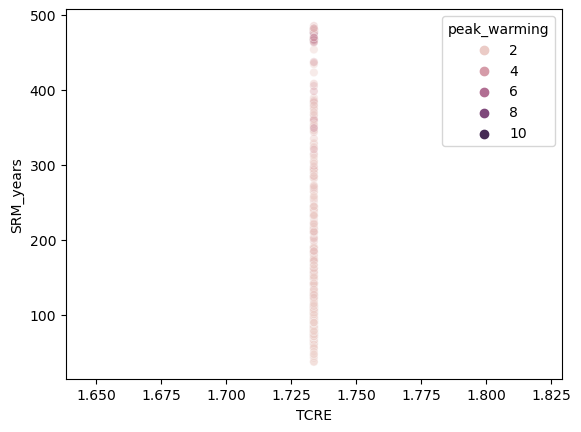

<IPython.core.display.Javascript object>

In [32]:
ax = sns.scatterplot(
    data=pdf_median_climate,
    x="TCRE",
    y="SRM_years",
    hue="peak_warming",
    alpha=0.4,
)
# ax.set_ylim([0, 500])
# ax.set_xlim([0, 25])